<a href="https://colab.research.google.com/github/rdi1/nutri/blob/test1/RDI_MCseedPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=darkviolet size=10>PROJETO: ANÁLISE ESTATíSTICO da CAMPANHA de  AVALIAÇÃO NUTRICIONAL POPULACIONAL </font>
***

## INTRODUÇÃO: 
Uma ONG recebe doações monetárias que financia suas acoes de combate à fome e promoção da saúde em vários países africanos em regiões de extrema pobreza.

A organização baseia-se na criação de centros comunitários com uma área clínica, onde as crianças  são avaliadas nutricionalmente e dietas específicas são diagnosticadas em cada caso.  No refeitório comunitário são produzidas e distribuídas as referidas dietas.

Durante o ano de 2019 forem realizadas 10 eventos para convocar a população em situação de extrema precaridade num 
 países africanos. O resultado do registro das crianças (nome/gênero/data de nascimento) e coleta de seus dados antropométricos (peso / altura) som a base do conjunto de dados. O pôs processamento proporciona o IMC (Índice Masa Corporal) e sua avaliação nutricional Zscore seguindo os critérios da OMS (Organização Mundial da Saúde)

## OBJETIVO do PROJETO:
Analisar os dados coletados para avaliar a situação, verificar a eficacia das ações executadas para propor melhorias.




# <font color=blue>DATASET DO PROJETO</font>
***

> ### COLUMN´s NAMES
> ***

<b>Id = </b>number

<b>Sexo = </b>gender 1→  boy     2→ girl

<b>IMC_Avi = </b>BMI caculated at i interview → number x.yyyy 

<b>idade_Avi = </b>age calculated at i interview → in months as INT number 

<b>Zscore_Avi = </b>Nutricional Evaluation at i interview, according to WHO,s criteria → INT number 1-6


#### <font color='red'><u>NOTE:</u></font> <b><i>Column -> Nome = child´s first name was "anonymized" by removig it from the raw data column and creating a file copy from the received file.
***


# <font color=blue> CRITERIOS OMS - WHO CRITERIA 
</font>


|Código|Descrição|
|---|---|
|1|Desnutrição aguda|
|2|Desnutrição moderada|
|3|Risco nutricional|
|4|normal|
|5|Sobrepeso|
|6|Obesidade|
|7|Obesidade graves|

# <font color=blue> PRINCIPAIS MÉTRICAS - MAIN STATISTICS</font>

|# KPI| COLUMNS | FUNCTION | FILTER | TITLE | X AXIS | Y AXIS | GRAPH | DESCRIPTION |
|---|---|---|---|---|---|---|---|---|							
|1|Sexo|Count|1 / 2|TOTAL Gender´s frequency|||Text|Population Gender´s frequency|
|2|idade_Avi|Boxplot (idade_Avi/12=years)|i 1_10||||Boxplot|Ages Overview|
|3|IMC_Avi|Count|	1 / 2 + i 1_10|Participation|Avi|INT / Sexo|Histogram|Presence at each Nutricional Evaluation|
|4|IMC_Avi|Count|	1 / 2 + i 1&10+w/o NaN|Completed Participation|||Text|Presence at ALL Nutricional Evaluations|
|5|Zscore_Avi|Count/Percentage|	i 1_10|Zscore Evolution|Avi|Zscore|Histogram|Overview at each Nutricional Evaluation|
|6|Zscore_Avi|Value|Id + i 1_10 +w/o NaN	|Patient Id´s Nutritional Progress|Avi|Zscore_Avi|Line|Patient´s nutritional assessment|






### >> Importar/Ativação das Bibliotecas


In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math


### >> Importa o dataset e visualiza


In [106]:
dados = pd.read_csv('MCseed.csv', sep = ':')


In [107]:
dados.head()

,Id,Sexo,IMC_Av1,IMC_Av2,IMC_Av3,IMC_Av4,IMC_Av5,IMC_Av6,IMC_Av7,IMC_Av8,IMC_Av9,IMC_Av10,idade_Av1,idade_Av2,idade_Av3,idade_Av4,idade_Av5,idade_Av6,idade_Av7,idade_Av8,idade_Av9,idade_Av10,Zscore_Av1,Zscore_Av2,Zscore_Av3,Zscore_Av4,Zscore_Av5,Zscore_Av6,Zscore_Av7,Zscore_Av8,Zscore_Av9,Zscore_Av10
0,1,1,12.188366,12.403817,12.086468,12.926633,13.103587,13.579605,13.619200,14.109347,13.819901,13.823954,4.0,4.0,4.0,7.0,7.0,7.0,7.0,8.0,8.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0
1,2,1,12.458437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,12.531150,12.993948,12.824197,12.266590,12.754955,13.138889,13.241415,13.747200,13.995153,13.845322,3.0,3.0,4.0,5.0,5.0,6.0,7.0,8.0,8.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0
3,4,2,12.812500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2,11.690934,12.222340,12.807164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,48.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### >> Cria lista de cabeçalhos**

In [109]:
list_age = ['idade_Av1', 'idade_Av2', 'idade_Av3','idade_Av4', 'idade_Av5', 'idade_Av6','idade_Av7', 'idade_Av8', 'idade_Av9','idade_Av10']
list_zscore = ['Zscore_Av1', 'Zscore_Av2', 'Zscore_Av3','Zscore_Av4', 'Zscore_Av5', 'Zscore_Av6','Zscore_Av7', 'Zscore_Av8', 'Zscore_Av9','Zscore_Av10']
list_bmi= ['IMC_Av1', 'IMC_Av2', 'IMC_Av3','IMC_Av4', 'IMC_Av5', 'IMC_Av6','IMC_Av7', 'IMC_Av8', 'IMC_Av9','IMC_Av10']
labels_an=['1.Desnutrição aguda', '2.Desnutrição moderada', '3.Risco nutricional', '4.normal', '5.Sobrepeso', '6.Obesidade', '7.Obesidade graves']
labels_sex=['Masculino', 'Feminino']
etiq = ['Av# 1', 'Av# 2', 'Av# 3', 'Av# 4', 'Av# 5', 'Av# 6', 'Av# 7', 'Av# 8', 'Av# 9', 'Av# 10']

## <font color=green>**1.- FREQUÊNCIA POR GÊNERO - Population Gender´s frequency**</font>
### <font color=blue> OBJETIVO »> Melhorar a visibilidade da participação estabelecendo possíveis correlações de GÊNERO

### >> Trabalhando diretamente sobre a coluna de Sexo consideramos o TOTAL de registros separados por gênero automaticamente, criando um Dataframe para sua visualização.

















In [110]:
frequencia_sexo = dados['Sexo'].value_counts()
percentual_sexo = dados['Sexo'].value_counts(normalize = True) * 100
dist_freq_qualitativas_sexo = pd.DataFrame({'Frequência': frequencia_sexo, 'Porcentagem (%)': percentual_sexo})
dist_freq_qualitativas_sexo.rename(index = {1: 'Masculino', 2: 'Feminino'}, inplace = True)
dist_freq_qualitativas_sexo.rename_axis('SEXO', axis= 'columns', inplace = True)
dist_freq_qualitativas_sexo

SEXO,Frequência,Porcentagem (%)
Masculino,154,53.846154
Feminino,132,46.153846


#### <font color='darkviolet'><b> <i> <u>ANALISE PRELIMINAR:</u> Num TOTAL de crianças registradas nesta CAMPANHA [286], forem avaliadas 46% de MENINAS e 54% de GAROTOS.

## <font color=green>**2.- DISTRIBUIÇÃO DAS IDADES - Ages’ Distrubution Boxplot**</font>
### <font color=blue>OBJETIVO »>  Para um EVENTO [Avi] ou para uma CAMPANHA [Av1....Av10]

### >>  Para avaliarmos o comportamento da variável idade_Avi num EVENTO, vamos construir uma tabela de frequências considerando as seguintes classes em frações de anos

Classes de Idade considerando o Maximo Valor do intervalo:

<b> 0,5 Ano</b> ► Ate 6 meses de idade

<b> 1 Ano</b> ► De 7 meses a 12 meses

<b> 1,5 Anos</b> ► De 13 a 18 meses

<b>2 Anos</b> ► De 19 a 24 meses

<b>2 Anos</b> ► De 19 a 24 meses

<b>2,5 Anos</b> ► De 25 a 30 meses

<b>3 Anos</b> ► De 31 a 36 meses

<b>3,5 Anos</b> ► De 37 a 42 meses

<b>4 Anos</b> ► De 43 a 48 meses

<b>4,5 Anos</b> ► De 49 a 54 meses

<b>5 Anos</b> ► De 55 a 60 meses

<b>5,5Anos</b> ► De 61 a 66 meses

<b>6 Anos</b> ► De 67 a 72 meses

<b>Mais de 6 Anos</b> ► De 71 a 120 meses



In [111]:
classes = [
    dados.idade_Av1.min(),
    1*6,
    2*8,
    3*6,
    4*6,
    5*6,
    6*6,
    7*6,
    8*6,
    9*6,
    10*6,
    11*6,
    12*6,
    dados.idade_Av1.max()
]
classes

[0.0, 6, 16, 18, 24, 30, 36, 42, 48, 54, 60, 66, 72, 156.0]

In [112]:
labels = ['0,5 A', '1 A', '1,5 A', '2 A', '2,5 A', '3 A', '3,5 A', '4 A', '4,5 A', '5 A', '5,5 A', '6 A', 'Maior de 6 A']

In [113]:
frequencia = pd.value_counts(
  pd.cut(x = dados.idade_Av1,
         bins = classes,
         labels = labels,
         include_lowest = True)
)
frequencia

0,5 A           104
1 A             101
2 A              23
Maior de 6 A     14
4 A               9
3 A               9
1,5 A             8
5 A               7
6 A               5
2,5 A             5
5,5 A             0
4,5 A             0
3,5 A             0
Name: idade_Av1, dtype: int64

In [114]:
percentual = pd.value_counts(
  pd.cut(x = dados.idade_Av1,
         bins = classes,
         labels = labels,
         include_lowest = True),
  normalize = True
) * 100
percentual

0,5 A           36.491228
1 A             35.438596
2 A              8.070175
Maior de 6 A     4.912281
4 A              3.157895
3 A              3.157895
1,5 A            2.807018
5 A              2.456140
6 A              1.754386
2,5 A            1.754386
5,5 A            0.000000
4,5 A            0.000000
3,5 A            0.000000
Name: idade_Av1, dtype: float64

In [115]:
dist_freq_renda = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_renda.sort_index(ascending = True)

,Frequência,Porcentagem (%)
"0,5 A",104,36.491228
1 A,101,35.438596
"1,5 A",8,2.807018
2 A,23,8.070175
"2,5 A",5,1.754386
3 A,9,3.157895
"3,5 A",0,0.000000
4 A,9,3.157895
"4,5 A",0,0.000000
5 A,7,2.456140


### >> Gráfico de barras "ORDENADO" para visualizar as informações da tabela de frequências 

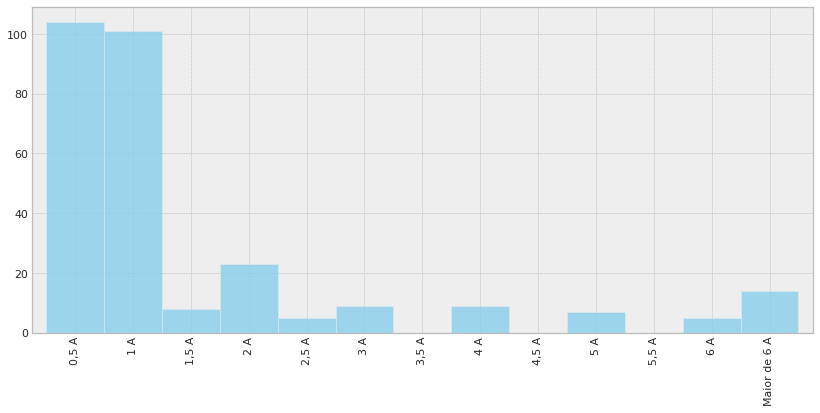

In [116]:
dist_freq_renda.sort_index(ascending = True)['Frequência'].plot.bar(width = 1, color = 'skyblue', alpha = 0.8, figsize=(14, 6))

### >> A distribuição de idades_Av1 sem separação por grupos de idades

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


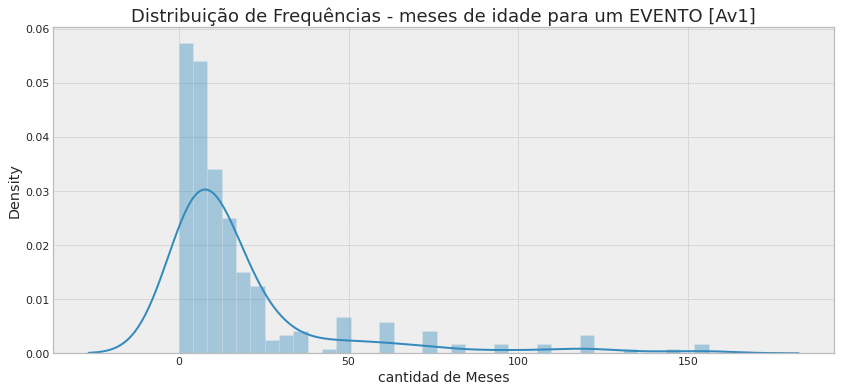

In [102]:
ax = sns.distplot(dados['idade_Av1'])
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências - meses de idade para um EVENTO [Av1]', fontsize=18)
ax.set_xlabel('cantidad de Meses', fontsize=14)
ax

#### <font color='darkviolet'><b> <i> <u>ANALISE PRELIMINAR:</u> Para o caso específico da primeira Avalição Nutricional [Av1], claramente mostra que a maioria das crianças examinadas não superam o ANO de idade


### >> Para avaliarmos o comportamento da variável idade_Av [meses] numa CAMPANHA usaremos BOXPLOT. 
### O gráfico completo permite uma fácil visualização e comparação


Text(0.5, 1.0, '2.- DISTRIBUIÇÃO DAS IDADES [meses]')

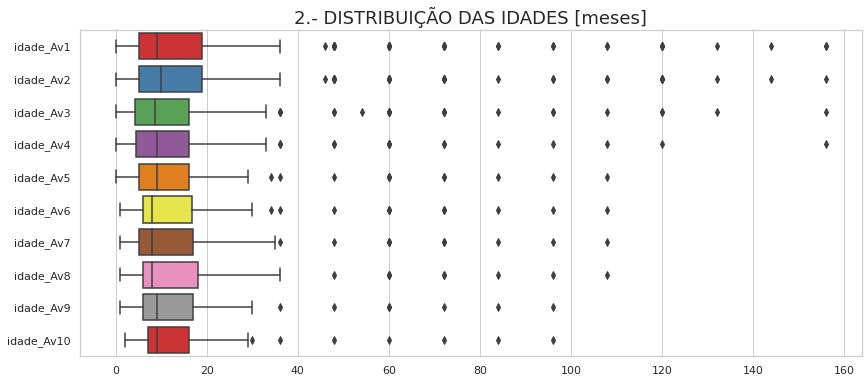

In [118]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 6)) 
idade = dados[list_age]
ax = sns.boxplot( data=idade, orient="h", palette="Set1")
ax.set_title('2.- DISTRIBUIÇÃO DAS IDADES [meses]', fontsize=18)

#### <font color='darkviolet'><b> <i> <u>ANALISE PRELIMINAR:</u> Mantem a principal faixa etária antes do ano e meio, mais a meia de meses vai disminuindo. Infere-se o egreso das criançãs de maior idade e aumento da participação dos mais prematuros.


## <font color=green>**3.- FREQUÊNCIA de PARTICIPAÇÃO - Presence at each Nutricional Evaluation**</font>
### <font color=blue> OBJETIVO »> Estimar possíveis causas de deserção ou ações que melhoram a convocatória das mães/crianças

### Estatística relevante para analisar condições externas que consigam justificar o nivel de convocatoria de cada EVENTO


### >> Seram contados os valores numéricos do IMC em cada EVENTO,

In [119]:
populacao = len(dados)
ausente=populacao - dados[list_bmi].count()
ausente

IMC_Av1       5
IMC_Av2      67
IMC_Av3     116
IMC_Av4     152
IMC_Av5     170
IMC_Av6     189
IMC_Av7     201
IMC_Av8     209
IMC_Av9     218
IMC_Av10    225
dtype: int64

In [120]:
frequencia_presentes= populacao-ausente
percentual_presentes = (frequencia_presentes/populacao) * 100
dist_freq_presentes = pd.DataFrame({'Frequência Participação': frequencia_presentes , 'Porcentagem (%)':percentual_presentes })
dist_freq_presentes

,Frequência Participação,Porcentagem (%)
IMC_Av1,281,98.251748
IMC_Av2,219,76.573427
IMC_Av3,170,59.440559
IMC_Av4,134,46.853147
IMC_Av5,116,40.559441
IMC_Av6,97,33.916084
IMC_Av7,85,29.720280
IMC_Av8,77,26.923077
IMC_Av9,68,23.776224
IMC_Av10,61,21.328671


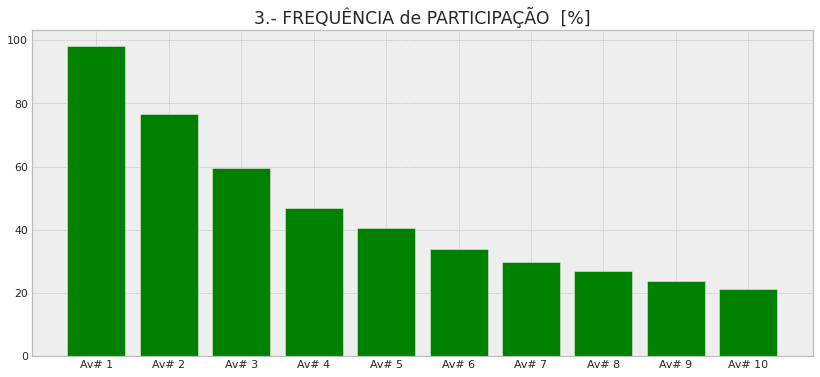

In [121]:
plt.figure(figsize=(14, 6))
plt.style.use("bmh")
y_pos = np.arange(len(etiq))
plt.bar(y_pos, dist_freq_presentes['Porcentagem (%)'], color='green')
plt.xticks(y_pos, etiq)
plt.title('3.- FREQUÊNCIA de PARTICIPAÇÃO  [%]')  
plt.show()

#### <font color='darkviolet'><b> <i> <u>ANALISE PRELIMINAR:</u> A participação cae durante a campanha chegando a um 21% de participação, mesmo registrando algumas criancas depois do inicio da mesma.

## <font color=green>**4.- ENGAJAMENTO DA POPULAÇÃO NA CAMPANHA - Present at ALL Nutricional Evaluations**</font>
### <font color=blue> OBJETIVO »> Saber quantas crianças comparecerem a todas as avaliações da campanha.

### Elas são identificadas por ter completos TODOS os dados de seu registro ou pela ausencia de "NaN" na linha sería outra opção de filtro.


### >> Começa o filtrado e tratamento dos dados para obter novos dataframes especificos

In [122]:
for index, row in dados.iterrows():
  linha_df=dados.loc[[index]]
  conta_valores=linha_df.count()
  quantidade_valores = conta_valores.sum()
  if(quantidade_valores > 31):
      dados.loc[index, 'COMPLETO'] = 1
  else:
      dados.loc[index, 'COMPLETO'] = 0

dados.head()

,Id,Sexo,IMC_Av1,IMC_Av2,IMC_Av3,IMC_Av4,IMC_Av5,IMC_Av6,IMC_Av7,IMC_Av8,IMC_Av9,IMC_Av10,idade_Av1,idade_Av2,idade_Av3,idade_Av4,idade_Av5,idade_Av6,idade_Av7,idade_Av8,idade_Av9,idade_Av10,Zscore_Av1,Zscore_Av2,Zscore_Av3,Zscore_Av4,Zscore_Av5,Zscore_Av6,Zscore_Av7,Zscore_Av8,Zscore_Av9,Zscore_Av10,COMPLETO
0,1,1,12.188366,12.403817,12.086468,12.926633,13.103587,13.579605,13.619200,14.109347,13.819901,13.823954,4.0,4.0,4.0,7.0,7.0,7.0,7.0,8.0,8.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0
1,2,1,12.458437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,3,1,12.531150,12.993948,12.824197,12.266590,12.754955,13.138889,13.241415,13.747200,13.995153,13.845322,3.0,3.0,4.0,5.0,5.0,6.0,7.0,8.0,8.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0
3,4,2,12.812500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,5,2,11.690934,12.222340,12.807164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,48.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


### >> Obter a listagem, frequencias e percentagens dos que completarem a CAMPANHA

In [124]:
completo = dados['COMPLETO'].value_counts()
p_completo = dados['COMPLETO'].value_counts(normalize = True) * 100
completo_df = pd.DataFrame({'Frequência': completo, 'Porcentagem (%)': p_completo})
completo_df.rename(index = {0: 'Parciais', 1: 'Completas'}, inplace = True)
completo_df.rename_axis('AVALIAÇÕES', axis= 'columns', inplace = True)
completo_df

AVALIAÇÕES,Frequência,Porcentagem (%)
Parciais,232,81.118881
Completas,54,18.881119


In [7]:
dados.head()


,Id,Sexo,IMC_Av1,IMC_Av2,IMC_Av3,IMC_Av4,IMC_Av5,IMC_Av6,IMC_Av7,IMC_Av8,IMC_Av9,IMC_Av10,idade_Av1,idade_Av2,idade_Av3,idade_Av4,idade_Av5,idade_Av6,idade_Av7,idade_Av8,idade_Av9,idade_Av10,Zscore_Av1,Zscore_Av2,Zscore_Av3,Zscore_Av4,Zscore_Av5,Zscore_Av6,Zscore_Av7,Zscore_Av8,Zscore_Av9,Zscore_Av10,COMPLETO
0,1,1,12.188366,12.403817,12.086468,12.926633,13.103587,13.579605,13.619200,14.109347,13.819901,13.823954,4.0,4.0,4.0,7.0,7.0,7.0,7.0,8.0,8.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0
1,2,1,12.458437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,3,1,12.531150,12.993948,12.824197,12.266590,12.754955,13.138889,13.241415,13.747200,13.995153,13.845322,3.0,3.0,4.0,5.0,5.0,6.0,7.0,8.0,8.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0
3,4,2,12.812500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,5,2,11.690934,12.222340,12.807164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.0,48.0,54.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [125]:
mask = (dados['COMPLETO'] < 1) 
cumpridores_df = dados.loc[~mask]
cumpridores_df.head()

,Id,Sexo,IMC_Av1,IMC_Av2,IMC_Av3,IMC_Av4,IMC_Av5,IMC_Av6,IMC_Av7,IMC_Av8,IMC_Av9,IMC_Av10,idade_Av1,idade_Av2,idade_Av3,idade_Av4,idade_Av5,idade_Av6,idade_Av7,idade_Av8,idade_Av9,idade_Av10,Zscore_Av1,Zscore_Av2,Zscore_Av3,Zscore_Av4,Zscore_Av5,Zscore_Av6,Zscore_Av7,Zscore_Av8,Zscore_Av9,Zscore_Av10,COMPLETO
0,1,1,12.188366,12.403817,12.086468,12.926633,13.103587,13.579605,13.619200,14.109347,13.819901,13.823954,4.0,4.0,4.0,7.0,7.0,7.0,7.0,8.0,8.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0
2,3,1,12.531150,12.993948,12.824197,12.266590,12.754955,13.138889,13.241415,13.747200,13.995153,13.845322,3.0,3.0,4.0,5.0,5.0,6.0,7.0,8.0,8.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0
12,13,1,12.264514,11.650485,12.335601,12.686319,13.583439,13.619835,14.188981,14.191324,14.138889,14.943485,0.0,0.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,4.0,4.0,3.0,2.0,3.0,3.0,2.0,3.0,2.0,2.0,3.0,1.0
18,19,1,10.063197,11.606220,12.344188,13.082156,13.090909,13.223140,14.046419,12.856099,13.713853,13.807398,5.0,5.0,5.0,5.0,5.0,7.0,7.0,8.0,8.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0
32,33,1,12.403828,12.835429,13.214490,13.381997,13.385312,13.205350,12.862759,13.512639,13.619852,13.637079,14.0,14.0,14.0,14.0,14.0,15.0,15.0,16.0,16.0,16.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0


In [126]:
cumpridores_df

,Id,Sexo,IMC_Av1,IMC_Av2,IMC_Av3,IMC_Av4,IMC_Av5,IMC_Av6,IMC_Av7,IMC_Av8,IMC_Av9,IMC_Av10,idade_Av1,idade_Av2,idade_Av3,idade_Av4,idade_Av5,idade_Av6,idade_Av7,idade_Av8,idade_Av9,idade_Av10,Zscore_Av1,Zscore_Av2,Zscore_Av3,Zscore_Av4,Zscore_Av5,Zscore_Av6,Zscore_Av7,Zscore_Av8,Zscore_Av9,Zscore_Av10,COMPLETO
0,1,1,12.188366,12.403817,12.086468,12.926633,13.103587,13.579605,13.619200,14.109347,13.819901,13.823954,4.0,4.0,4.0,7.0,7.0,7.0,7.0,8.0,8.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0
2,3,1,12.531150,12.993948,12.824197,12.266590,12.754955,13.138889,13.241415,13.747200,13.995153,13.845322,3.0,3.0,4.0,5.0,5.0,6.0,7.0,8.0,8.0,9.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0
12,13,1,12.264514,11.650485,12.335601,12.686319,13.583439,13.619835,14.188981,14.191324,14.138889,14.943485,0.0,0.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,4.0,4.0,3.0,2.0,3.0,3.0,2.0,3.0,2.0,2.0,3.0,1.0
18,19,1,10.063197,11.606220,12.344188,13.082156,13.090909,13.223140,14.046419,12.856099,13.713853,13.807398,5.0,5.0,5.0,5.0,5.0,7.0,7.0,8.0,8.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0
32,33,1,12.403828,12.835429,13.214490,13.381997,13.385312,13.205350,12.862759,13.512639,13.619852,13.637079,14.0,14.0,14.0,14.0,14.0,15.0,15.0,16.0,16.0,16.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0
33,34,1,11.715556,12.990406,12.806456,12.701197,12.241628,12.610159,12.225605,12.289697,12.401859,12.241628,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,48.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
34,35,1,11.464497,11.747953,12.210751,12.815949,12.684459,12.859504,13.260957,13.061214,13.328209,13.523021,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,4.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0
39,40,1,11.031313,11.605860,11.472222,11.100587,11.206665,11.400530,11.421773,11.715600,11.305852,11.300131,4.0,4.0,4.0,4.0,5.0,5.0,5.0,6.0,6.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
41,42,2,11.936272,12.434595,12.496153,12.852962,13.137540,13.214594,13.329503,13.599366,13.506560,13.434695,5.0,5.0,5.0,6.0,6.0,6.0,6.0,7.0,7.0,7.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0
47,48,1,13.171947,13.385546,13.100137,13.355372,13.105867,13.468579,13.553478,13.550856,13.083333,13.189700,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,2.0,1.0


#### <font color='darkviolet'><b> <i> <u>ANALISE PRELIMINAR:</u> 54 crianças completarem a CAMPANHA, representando o 18% da população avaliada.

## <font color=green>**5.- REVISÃO DAS AVALIAÇÕES NUTRICIONAIS POR EVENTO - Overview at each Nutricional Evaluation** </font>
### <font color=blue> OBJETIVO »> Visibilidade dos estados nutricionais do grupo nesse EVENTO

### Será necessario selecionar o evento a partir da coluna Zscore_Avi



### >> Com um comando é posível ver de forma ORDENADA decrescente a distribuilção dos diagnósticos.-

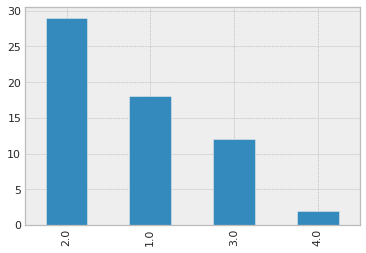

In [127]:
dados['Zscore_Av10'].value_counts().plot.bar()

### >> Com seaborn

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


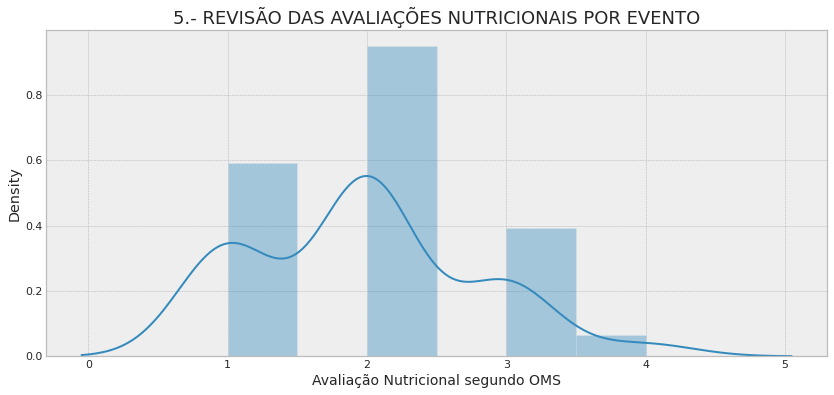

In [128]:
ax = sns.distplot(dados['Zscore_Av10'])
ax.figure.set_size_inches(14, 6)
ax.set_title('5.- REVISÃO DAS AVALIAÇÕES NUTRICIONAIS POR EVENTO', fontsize=18)
ax.set_xlabel('Avaliação Nutricional segundo OMS', fontsize=14)
ax

#### <font color='darkviolet'><b> <i> <u>ANALISE PRELIMINAR:</u> A maioria das crianças NESTE EVENTO apresentarem um estado nutricional DESNUTRIÇÃO MODERADA[2].


## <font color=green>**6.- SEGUIMENTO DAS AVALIAÇÕES NUTRICIONAIS INDIVIDUAL -  Patient´s nutritional assessment** </font>
### <font color=blue> OBJETIVO »> Analisar graficamente a evolução do estado nutricional de um paciente em particular.

### Será necessario identificar a criança pelo seu Id para graficar suas estatisticas.-



### >> Seleção do individuo e fatiamento do dataframe para criar um novo, reducido e específico para essa criança.

In [73]:
index = 5
av_df=dados.loc[[index]]
av_df.drop(axis=1, columns='Id', inplace=True)
av_df.drop(axis=1, columns='Sexo', inplace=True)
av_df.drop(axis=1, columns='IMC_Av1', inplace=True)
av_df.drop(axis=1, columns='IMC_Av2', inplace=True)
av_df.drop(axis=1, columns='IMC_Av3', inplace=True)
av_df.drop(axis=1, columns='IMC_Av4', inplace=True)
av_df.drop(axis=1, columns='IMC_Av5', inplace=True)
av_df.drop(axis=1, columns='IMC_Av6', inplace=True)
av_df.drop(axis=1, columns='IMC_Av7', inplace=True)
av_df.drop(axis=1, columns='IMC_Av8', inplace=True)
av_df.drop(axis=1, columns='IMC_Av9', inplace=True)
av_df.drop(axis=1, columns='IMC_Av10', inplace=True)
av_df.drop(axis=1, columns='idade_Av1', inplace=True)
av_df.drop(axis=1, columns='idade_Av2', inplace=True)
av_df.drop(axis=1, columns='idade_Av3', inplace=True)
av_df.drop(axis=1, columns='idade_Av4', inplace=True)
av_df.drop(axis=1, columns='idade_Av5', inplace=True)
av_df.drop(axis=1, columns='idade_Av6', inplace=True)
av_df.drop(axis=1, columns='idade_Av7', inplace=True)
av_df.drop(axis=1, columns='idade_Av8', inplace=True)
av_df.drop(axis=1, columns='idade_Av9', inplace=True)
av_df.drop(axis=1, columns='idade_Av10', inplace=True)
av_df.drop(axis=1, columns='COMPLETO', inplace=True)

av_df

,Zscore_Av1,Zscore_Av2,Zscore_Av3,Zscore_Av4,Zscore_Av5,Zscore_Av6,Zscore_Av7,Zscore_Av8,Zscore_Av9,Zscore_Av10
5,2.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
av_table = av_df.transpose()
av_table

,5
Zscore_Av1,2.0
Zscore_Av2,3.0
Zscore_Av3,3.0
Zscore_Av4,3.0
Zscore_Av5,NaN
Zscore_Av6,NaN
Zscore_Av7,NaN
Zscore_Av8,NaN
Zscore_Av9,NaN
Zscore_Av10,NaN


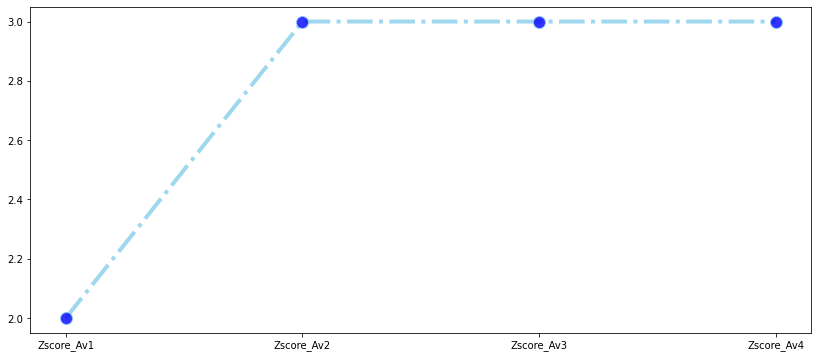

In [75]:
plt.figure(figsize=(14, 6))
plt.plot(av_table[index], data=av_table, color='skyblue', alpha=0.8, linestyle='-.' , linewidth=4, marker='o', markerfacecolor='blue', markersize=12)
plt.show()

#### <font color='darkviolet'><b> <i> <u>ANALISE PRELIMINAR:</u> A escala dos eixos X e Y se ajustam aos valores da serie escolhida.

*   Item da lista
*   Item da lista



***
# <font color=darkviolet size=10>RELATÓRIO FINAL </font>
***

## CONCLUSÕES: 

286 Crianças foram Avaliadas Nutricionalmente no início desta campanha.
54% Meninos e 46% Meninas.

Completarem as 10 Avaliações Nutricionais desta campanha 61 crianças, representando um 21% da população inicial. Com 62% de meninos e 38% de meninas.

As porcentagens durante a campanha mostram uma importante MIGRAÇÃO de “Desnutrição Aguda” para “Desnutrição Moderada”, um razoável  aumento de crianças já em “Risco de Desnutrição” e afortunadamente se mantém um nível aceitável de estado nutricional “Normal” (considerando a possível saída dessas crianças do sistema de assistência alimentar)

## SUGESTÕES DE MELHORIAS: 


Programar as datas das Avaliações Nutricionais durante o ano/campanha, para correlacionar as medidas por períodos/locais de atendimento.

Sistematizar o processo de Avaliação Nutricional na Recepção como triagem (Nome + Gênero + Idade + Medir peso/altura + Calculadora AN), registrando as Fichas Médicas em Google Drive. 

Promover eventos/mutirões culturais/sociais/esportivos em cada estação do ano, para aumentar a participação garantido no mínimo 4 Avaliações Nutricionais. A organização/participação das caravanas seriam muito úteis nestes eventos.

Definir Objetivos e Resultados-chaves (OKR) anuais para o grupo de trabalho.


### <<< OVERVIEW >>>

In [54]:
overview = dados.describe()
overview

,Id,Sexo,IMC_Av1,IMC_Av2,IMC_Av3,IMC_Av4,IMC_Av5,IMC_Av6,IMC_Av7,IMC_Av8,IMC_Av9,IMC_Av10,idade_Av1,idade_Av2,idade_Av3,idade_Av4,idade_Av5,idade_Av6,idade_Av7,idade_Av8,idade_Av9,idade_Av10,Zscore_Av1,Zscore_Av2,Zscore_Av3,Zscore_Av4,Zscore_Av5,Zscore_Av6,Zscore_Av7,Zscore_Av8,Zscore_Av9,Zscore_Av10
count,286.0000,286.000000,281.000000,219.000000,170.000000,134.000000,116.000000,97.000000,85.000000,77.000000,68.000000,61.000000,285.000000,228.000000,178.000000,139.000000,119.000000,98.000000,86.000000,78.000000,68.000000,61.000000,281.000000,219.000000,170.000000,134.000000,116.000000,98.000000,85.000000,77.00000,68.000000,61.000000
mean,143.5000,1.461538,12.777807,12.891464,12.869347,12.914057,13.119375,13.217834,13.225681,13.374739,13.403921,13.327608,18.768421,19.355263,17.443820,16.158273,14.756303,16.255102,16.662791,17.935897,15.794118,15.704918,1.846975,1.931507,1.894118,1.835821,1.991379,1.989796,1.976471,2.12987,2.029412,1.967213
std,82.7053,0.499392,1.579439,1.346253,1.318350,1.207673,1.261644,1.235941,1.273764,1.333702,1.374386,1.245348,27.408280,27.860747,25.754155,23.552057,19.017818,20.514170,21.671673,22.431622,19.087824,19.095675,0.960692,0.918646,0.863782,0.842428,0.955494,0.890904,0.912564,0.96451,0.913752,0.795135
min,1.0000,1.000000,8.650519,8.832645,9.037037,9.642372,9.616829,9.999317,10.292932,10.373555,10.454179,10.232005,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,72.2500,1.000000,11.834027,12.078193,12.205794,12.277813,12.354922,12.456710,12.558662,12.586322,12.373228,12.474425,5.000000,5.000000,4.250000,4.500000,5.000000,6.000000,5.000000,6.000000,6.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000
50%,143.5000,1.000000,12.792217,12.980466,12.969537,13.009564,13.123699,13.264551,13.260957,13.331198,13.393478,13.365052,9.000000,10.000000,8.500000,9.000000,9.000000,8.000000,8.000000,8.000000,9.000000,9.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
75%,214.7500,2.000000,13.590450,13.754190,13.810182,13.773811,13.902134,14.124493,14.019619,14.151111,14.112981,13.902480,19.000000,19.000000,16.000000,16.000000,16.000000,16.750000,17.000000,18.000000,17.000000,16.000000,2.000000,3.000000,2.750000,2.000000,3.000000,3.000000,3.000000,3.00000,2.000000,2.000000
max,286.0000,2.000000,25.840945,17.526393,16.111111,15.770657,16.233977,16.464681,16.076963,16.981072,17.800783,16.197100,156.000000,156.000000,156.000000,156.000000,108.000000,108.000000,108.000000,108.000000,96.000000,96.000000,7.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,4.000000


### <<< EOF >>>
